In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(
    'https://gist.githubusercontent.com/andron23/f73a19243564d80a388db2b7b1542fd2/raw/2479b4326f6c8ae13d06060fb8510d04bcf06113/apteka.csv',
     sep=';'
)

In [ ]:
df.head()

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
0,2021-07-13 12:56:09,Аптека 2,2000200195023,51,0,3400,3400,15#2002741#65938#2_29
1,2021-07-30 10:42:00,Аптека 2,2000200193494,57,0,747,747,15#2002972#65955#2_5
2,2021-10-11 12:55:23,Аптека 2,2000200199106,92,253,3077,3077,15#2004060#66028#2_29
3,2021-10-14 14:48:56,Аптека 2,2000200168768,1,0,54,54,15#2004107#66031#2_57
4,2021-10-20 11:09:39,Аптека 2,2000200226314,101,0,1733,1733,15#2004192#66037#2_16


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38486 entries, 0 to 38485
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        38486 non-null  datetime64[ns]
 1   shop            38486 non-null  object        
 2   card            38486 non-null  object        
 3   bonus_earned    38486 non-null  int64         
 4   bonus_spent     38486 non-null  int64         
 5   summ            38486 non-null  int64         
 6   summ_with_disc  38486 non-null  int64         
 7   doc_id          38486 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.3+ MB


In [ ]:
df = df[df['card'].str.startswith('2000')]

In [ ]:
df = df.sort_values(['card', 'datetime'])
df

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
641,2021-07-19 09:37:20,Аптека 2,2000200150015,0,1,21,21,15#2002822#65944#2_6
16455,2021-12-07 20:25:21,Аптека 2,2000200150022,30,0,1351,1351,15#2004825#66085#2_140
8751,2021-10-05 16:31:25,Аптека 2,2000200150053,15,0,649,649,15#2003981#66022#2_65
28718,2022-03-17 20:50:23,Аптека 7,2000200150053,1,0,64,64,15#11002624#66185#11_177
834,2021-07-21 11:10:25,Аптека 2,2000200150091,22,0,746,746,15#2002857#65946#2_4
...,...,...,...,...,...,...,...,...
38150,2022-06-07 17:08:45,Аптека 2,2000200259015,69,0,664,664,15#2003527#66267#2_73
38199,2022-06-07 19:19:12,Аптека 2,2000200259381,53,0,245,245,15#2003527#66267#2_109
38147,2022-06-07 19:37:59,Аптека 2,2000200259398,65,0,395,395,15#2003527#66267#2_113
38226,2022-06-08 09:46:52,Аптека 2,2000200259404,73,0,784,784,15#2003546#66268#2_7


In [ ]:
df2 = df.groupby('card').agg(
    purchase_sum = ('summ_with_disc', 'sum'),
    purchase_amount = ('summ_with_disc', 'count'),
    last_purchase = ('datetime', 'last'),
).reset_index()

In [ ]:
df[df['card'] == '2000200150091']

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id,date_joined,diff,last_purchase
834,2021-07-21 11:10:25,Аптека 2,2000200150091,22,0,746,746,15#2002857#65946#2_4,2021-07-21 11:10:25,NaN,NaT
12681,2021-11-06 16:37:26,Аптека 2,2000200150091,45,0,1509,1509,15#2004425#66054#2_53,2021-07-21 11:10:25,108.0,2021-07-21 11:10:25
12856,2021-11-08 12:12:17,Аптека 2,2000200150091,20,67,753,753,15#2004429#66056#2_24,2021-07-21 11:10:25,1.0,2021-11-06 16:37:26
35317,2022-05-15 11:58:24,Аптека 11,2000200150091,10,0,342,342,15#18001380#66244#18_32,2021-07-21 11:10:25,187.0,2021-11-08 12:12:17
37842,2022-06-05 11:49:47,Аптека 2,2000200150091,5,0,199,199,15#2003499#66265#2_22,2021-07-21 11:10:25,20.0,2022-05-15 11:58:24


In [ ]:
df2

,card,purchase_sum,purchase_amount,last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20
1,2000200150022,1351,1,2021-12-07 20:25:21
2,2000200150053,713,2,2022-03-17 20:50:23
3,2000200150091,3549,5,2022-06-05 11:49:47
4,2000200150107,1735,3,2022-06-02 17:54:19
...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45
5922,2000200259381,245,1,2022-06-07 19:19:12
5923,2000200259398,395,1,2022-06-07 19:37:59
5924,2000200259404,784,1,2022-06-08 09:46:52


In [ ]:
df2['days_since_last_purchase'] = (max(df['datetime']) - df2['last_purchase']).dt.days

In [ ]:
df2

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20,325
1,2000200150022,1351,1,2021-12-07 20:25:21,184
2,2000200150053,713,2,2022-03-17 20:50:23,84
3,2000200150091,3549,5,2022-06-05 11:49:47,4
4,2000200150107,1735,3,2022-06-02 17:54:19,7
...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2
5922,2000200259381,245,1,2022-06-07 19:19:12,2
5923,2000200259398,395,1,2022-06-07 19:37:59,2
5924,2000200259404,784,1,2022-06-08 09:46:52,1


In [ ]:
import seaborn as sns

<Axes: ylabel='purchase_sum'>

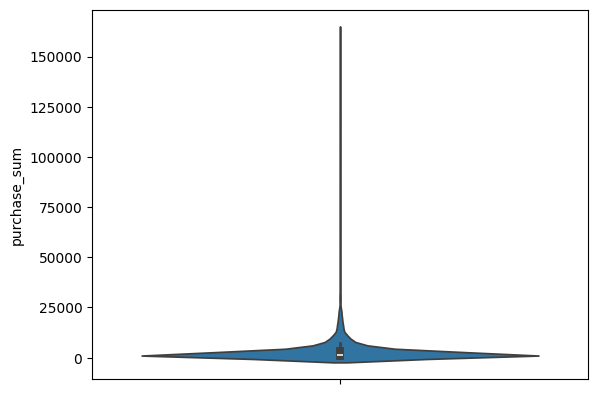

In [ ]:
sns.violinplot(df2['purchase_sum'])

In [ ]:
import numpy as np

In [ ]:
quantiles = [round(el, 2) for el in np.arange(0.1, 1.1, 0.1)]

In [ ]:
df2['purchase_sum'].quantile(quantiles)

0.1       405.5
0.2       620.0
0.3       844.0
0.4      1103.0
0.5      1470.5
0.6      2008.0
0.7      2731.0
0.8      4078.0
0.9      6906.5
1.0    162687.0
Name: purchase_sum, dtype: float64

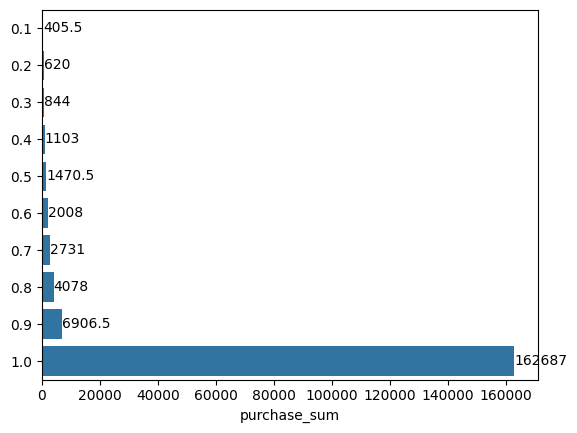

In [ ]:
ax = sns.barplot(
    df2['purchase_sum'].quantile(quantiles),
    orient='h'
)

ax.bar_label(ax.containers[-1]);

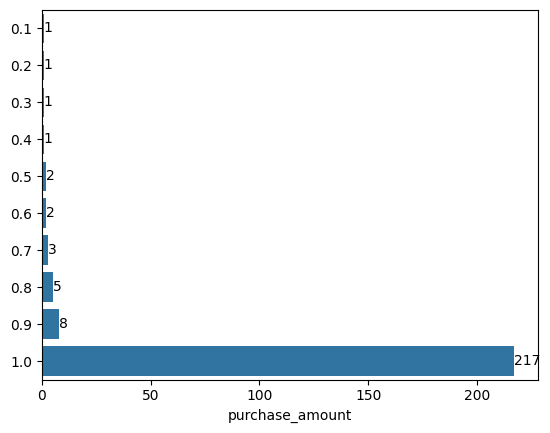

In [ ]:
ax = sns.barplot(
    df2['purchase_amount'].quantile(quantiles),
    orient='h'
)

ax.bar_label(ax.containers[-1]);

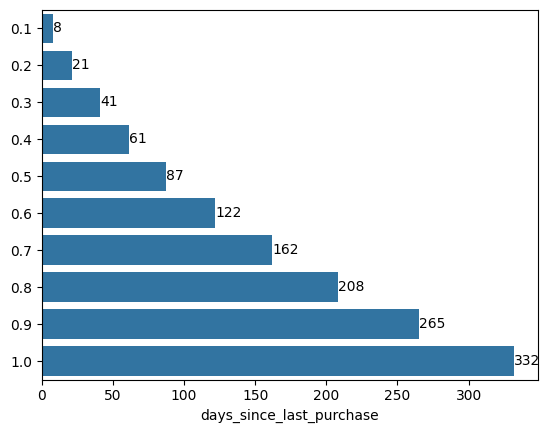

In [ ]:
ax = sns.barplot(
    df2['days_since_last_purchase'].quantile(quantiles),
    orient='h'
)

ax.bar_label(ax.containers[-1]);

In [ ]:
quantiles = [0.33, 0.66]

In [ ]:
df2['days_since_last_purchase'].quantile(quantiles)

0.33     48.0
0.66    143.0
Name: days_since_last_purchase, dtype: float64

In [ ]:
df2

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20,325
1,2000200150022,1351,1,2021-12-07 20:25:21,184
2,2000200150053,713,2,2022-03-17 20:50:23,84
3,2000200150091,3549,5,2022-06-05 11:49:47,4
4,2000200150107,1735,3,2022-06-02 17:54:19,7
...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2
5922,2000200259381,245,1,2022-06-07 19:19:12,2
5923,2000200259398,395,1,2022-06-07 19:37:59,2
5924,2000200259404,784,1,2022-06-08 09:46:52,1


In [ ]:
def set_score(val, var, perc_33, perc_66):
  if val < perc_33:
    return 3 if var != 'R' else 1
  elif val < perc_66:
    return 2
  else:
    return 1 if var != 'R' else 3

recency_quantiles = df2['days_since_last_purchase'].quantile(quantiles)
df2['R'] = df2['days_since_last_purchase'].apply(set_score, args=('R', recency_quantiles.iloc[0], recency_quantiles.iloc[1]))

frequency_quantiles = df2['purchase_amount'].quantile(quantiles)
df2['F'] = df2['purchase_amount'].apply(set_score, args=('F', frequency_quantiles.iloc[0], frequency_quantiles.iloc[1]))

monetary_quantiles = df2['purchase_sum'].quantile(quantiles)
df2['M'] = df2['purchase_sum'].apply(set_score, args=('M', monetary_quantiles.iloc[0], monetary_quantiles.iloc[1]))

In [ ]:
df2

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,R,F,M
0,2000200150015,21,1,2021-07-19 09:37:20,325,3,2,3
1,2000200150022,1351,1,2021-12-07 20:25:21,184,3,2,2
2,2000200150053,713,2,2022-03-17 20:50:23,84,2,2,3
3,2000200150091,3549,5,2022-06-05 11:49:47,4,1,1,1
4,2000200150107,1735,3,2022-06-02 17:54:19,7,1,1,2
...,...,...,...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2,1,2,3
5922,2000200259381,245,1,2022-06-07 19:19:12,2,1,2,3
5923,2000200259398,395,1,2022-06-07 19:37:59,2,1,2,3
5924,2000200259404,784,1,2022-06-08 09:46:52,1,1,2,3


In [ ]:
df2['RFM'] = df2.apply(lambda row: f"{row['R']}{row['F']}{row['M']}", axis=1)

In [ ]:
df2

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,R,F,M,RFM
0,2000200150015,21,1,2021-07-19 09:37:20,325,3,2,3,323
1,2000200150022,1351,1,2021-12-07 20:25:21,184,3,2,2,322
2,2000200150053,713,2,2022-03-17 20:50:23,84,2,2,3,223
3,2000200150091,3549,5,2022-06-05 11:49:47,4,1,1,1,111
4,2000200150107,1735,3,2022-06-02 17:54:19,7,1,1,2,112
...,...,...,...,...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2,1,2,3,123
5922,2000200259381,245,1,2022-06-07 19:19:12,2,1,2,3,123
5923,2000200259398,395,1,2022-06-07 19:37:59,2,1,2,3,123
5924,2000200259404,784,1,2022-06-08 09:46:52,1,1,2,3,123


In [ ]:
import plotly.express as px

In [ ]:
df3 = df2.groupby('RFM')['RFM'].agg({'count'}).reset_index()
df3

,RFM,count
0,111,862
1,112,203
2,113,32
3,121,118
4,122,340
5,123,395
6,211,488
7,212,223
8,213,34
9,221,176


In [ ]:
px.treemap(df3, path=['RFM'], values='count')